In [1]:
import collections
from collections import OrderedDict
import pandas as pd
import time as tm

In [2]:
run -i "base_compression.py"

In [3]:
run -i "box_car_algorithm.py"

In [4]:
run -i "swinging_door_algorithm.py"

In [5]:
run -i "hybrid_compression.py"

In [6]:
run -i "unordered_time_series_compressor.py"

# Example 1: Run thousands of data points

First showcase running thousands of data points, which represent some counter values from a software system.

In [7]:
data_size = 500
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [8]:
df = pd.read_csv('data/sample1.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
shuffled_df = df.sample(frac=1)

data = {}

for index, row in shuffled_df.iterrows():
    data[index] = row['Counter']

In [9]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

box_car_chunks = {}

for time, value in data.items():
    box_car_chunks[time] = value
    
    if indices[counter] == len(box_car_chunks):
        box_car_compressor._compress_chunk(box_car_chunks)
        
        box_car_chunks = {}
        counter += 1
        
box_car = box_car_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

Initial deviation: 111.67106806998648
Initial deviation: 124.31487802331348
Initial deviation: 138.55784065886047
Initial deviation: 156.0321091148659
0.10185790061950684  seconds time elapsed in running box car.
5970 number of data points discarded as part of box car window
500 data points remaining


In [10]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [11]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 111.67106806998648
Initial deviation: 124.31487802331348
Initial deviation: 138.55784065886047
Initial deviation: 167.9712385312957
0.24459505081176758  seconds time elapsed in running exception.
5976 number of data points discarded as part of swinging door window
494 data points remaining


In [12]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [13]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 111.67106806998648
Initial deviation: 124.31487802331348
Initial deviation: 138.55784065886047
Initial deviation: 167.9712385312957
0.31117796897888184  seconds time elapsed in running exception.
5976 number of data points discarded as part of exception window
494 data points remaining


In [14]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


C:\Users\sijian\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'sqrt', 'indices', 'inf', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


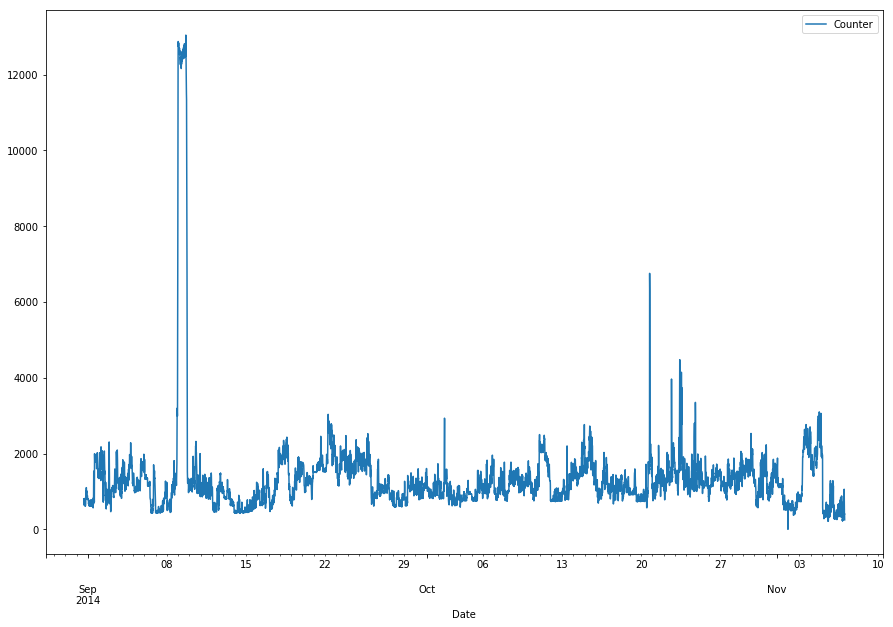

In [15]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


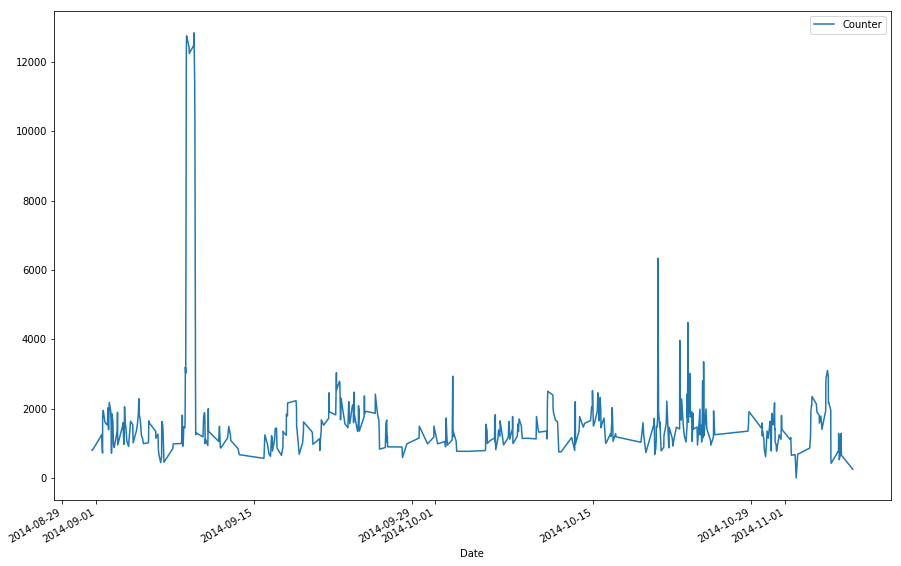

In [16]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


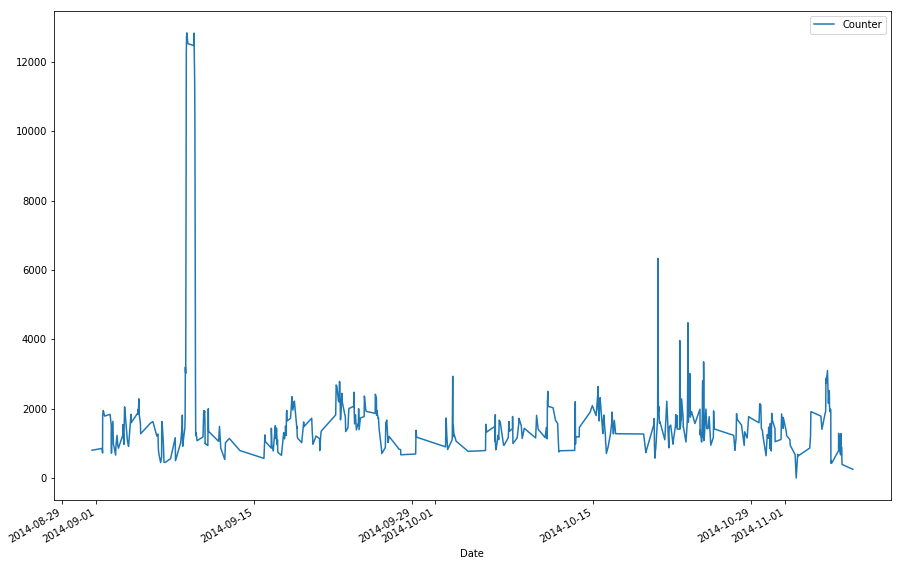

In [17]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


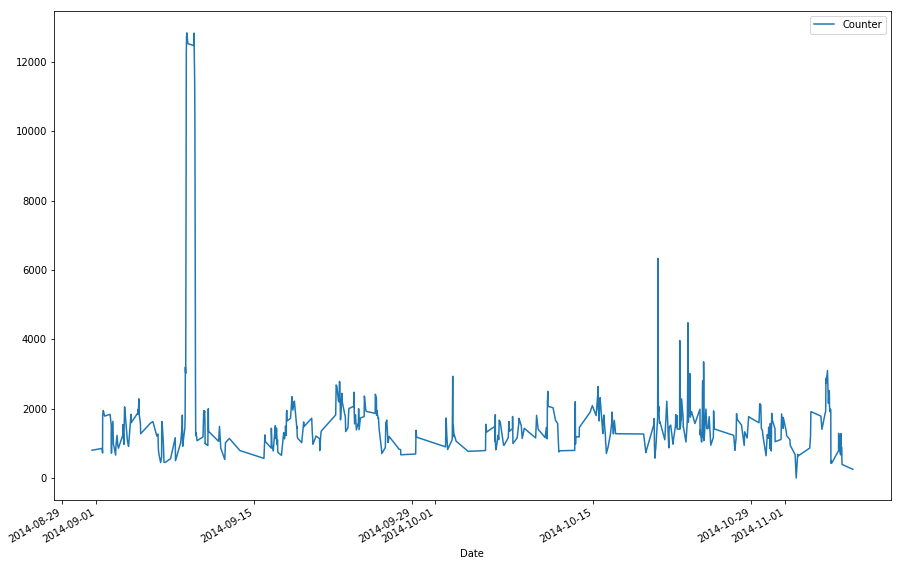

In [18]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 2: Run tens of data points

Second showcase tens of float data points.

In [19]:
data_size = 30
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [20]:
df = pd.read_csv('data/sample2.csv', parse_dates=True, index_col=0)
df['Value'] = df['Value'].astype(float)
data = {}
shuffled_df = df.sample(frac=1)

for index, row in shuffled_df.iterrows():
    data[index] = row['Value']

In [21]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

box_car_chunks = {}

for time, value in data.items():
    box_car_chunks[time] = value
    
    if indices[counter] == len(box_car_chunks):
        box_car_compressor._compress_chunk(box_car_chunks)
        
        box_car_chunks = {}
        counter += 1
        
box_car = box_car_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

Initial deviation: 0.59520431224269
Initial deviation: 1.300549271354384
Initial deviation: 1.3684964601048513
Initial deviation: 1.4283191376755522
0.0049932003021240234  seconds time elapsed in running box car.
41 number of data points discarded as part of box car window
30 data points remaining


In [22]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [23]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 0.59520431224269
Initial deviation: 1.300549271354384
Initial deviation: 1.3684964601048513
Initial deviation: 1.3961107514225646
0.003959178924560547  seconds time elapsed in running exception.
38 number of data points discarded as part of swinging door window
33 data points remaining


In [24]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [25]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 0.59520431224269
Initial deviation: 1.300549271354384
Initial deviation: 1.3684964601048513
Initial deviation: 1.3961107514225646
0.019561052322387695  seconds time elapsed in running exception.
38 number of data points discarded as part of exception window
33 data points remaining


In [26]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


C:\Users\sijian\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


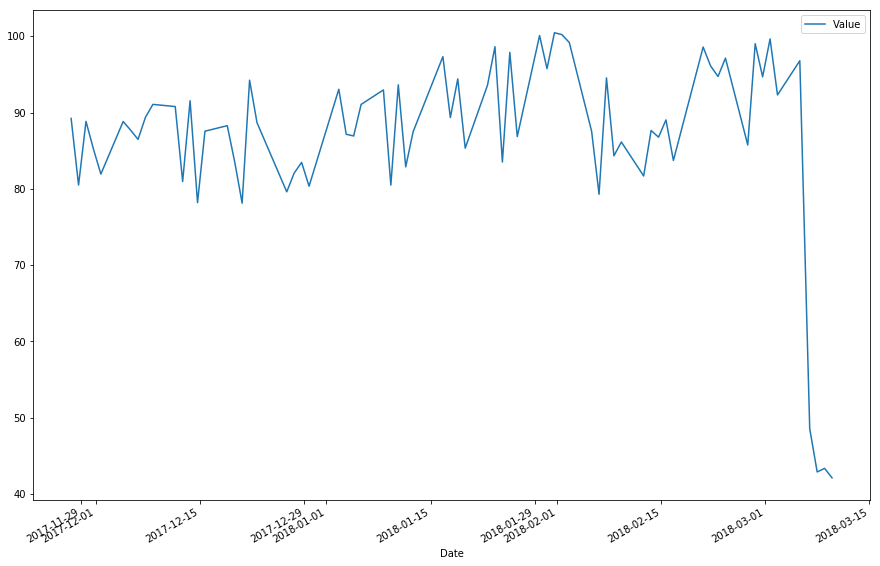

In [27]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


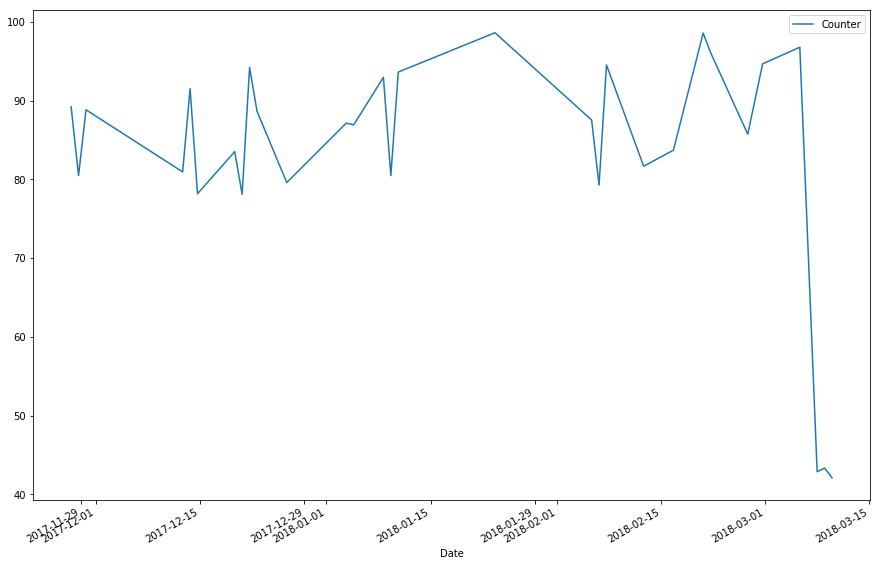

In [28]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


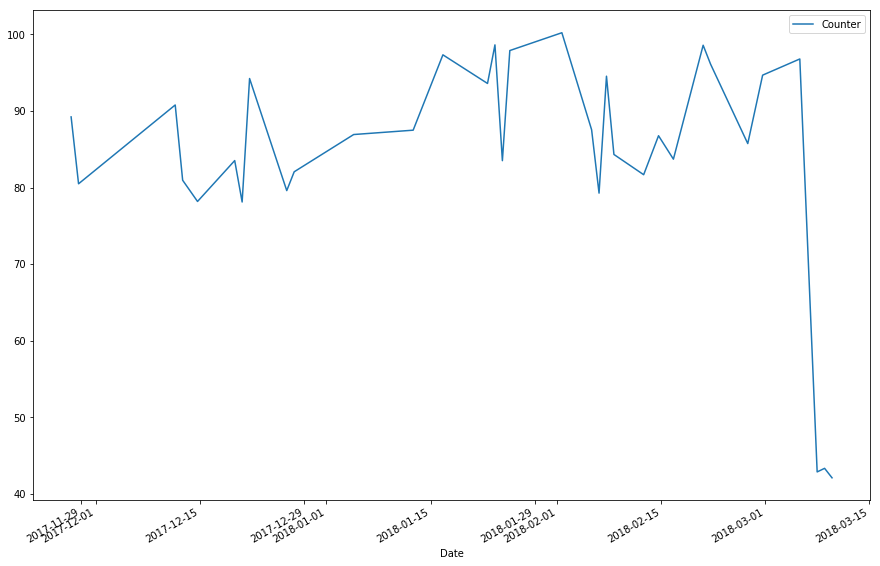

In [29]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


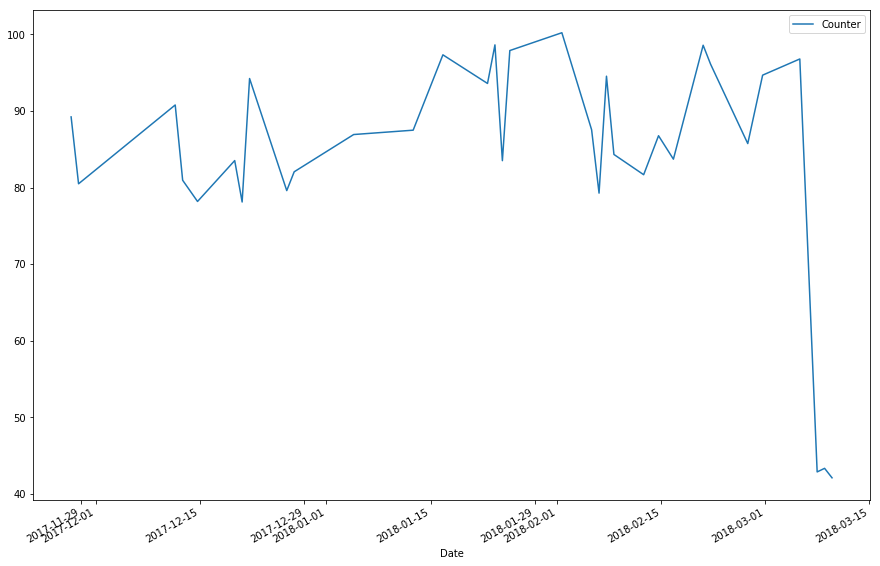

In [30]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()

# Example 3: Run millions of data points

Third showcase large dataset, random generated from excel with some range.

In [31]:
data_size = 500
box_car_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar)
swinging_door_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.SwingingDoor)
hybrid_compressor = UnorderedTimeSeriesCompressor(data_size, Algorithm.BoxCar.Hybrid)

In [32]:
df = pd.read_csv('data/sample3.csv', parse_dates=True, index_col=0)
df['Counter'] = df['Counter'].astype(float)
data = {}
shuffled_df = df.sample(frac=1)

for index, row in shuffled_df.iterrows():
    data[index] = row['Counter']

In [33]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

box_car_chunks = {}

for time, value in data.items():
    box_car_chunks[time] = value
    
    if indices[counter] == len(box_car_chunks):
        box_car_compressor._compress_chunk(box_car_chunks)
        
        box_car_chunks = {}
        counter += 1
        
box_car = box_car_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running box car."))
print("{} {}".format((len(data) - len(box_car)), "number of data points discarded as part of box car window"))
print("{} {}".format(len(box_car), "data points remaining"))

Initial deviation: 3722.2864151665153
Initial deviation: 3750.432903452288
Initial deviation: 3739.060171114539
Initial deviation: 3740.720953384596
Initial deviation: 3720.960504942418
Initial deviation: 3739.8982881163583
Initial deviation: 3729.550757991571
Initial deviation: 3730.074371165855
Initial deviation: 3711.0500547243073
Initial deviation: 3700.0476451625464
Initial deviation: 3722.6850852825146
Initial deviation: 3735.7028285744063
Initial deviation: 3738.1828598926745
Initial deviation: 3724.5316082232
Initial deviation: 3701.8497677405016
Initial deviation: 3710.5424320004377
Initial deviation: 3723.9576855980945
Initial deviation: 3753.379708919784
Initial deviation: 3749.3037055700406
Initial deviation: 3738.566586882777
Initial deviation: 3729.999430210926
Initial deviation: 3714.425883812968
Initial deviation: 3698.862377282619
Initial deviation: 3728.348447240611
Initial deviation: 3697.963365561353
Initial deviation: 3741.0057653794174
Initial deviation: 3697.0400

In [34]:
box_car_modified = {}

for time, value in box_car.items():
    box_car_modified[time] = [time, value]

box_car_df = pd.DataFrame.from_dict(box_car_modified, orient='index')
box_car_df.columns = ['Date', 'Counter']
box_car_df.set_index('Date', inplace=True)

In [35]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

swinging_door_chunks = {}

for time, value in data.items():
    swinging_door_chunks[time] = value
    
    if indices[counter] == len(swinging_door_chunks):
        swinging_door_compressor._compress_chunk(swinging_door_chunks)
        
        swinging_door_chunks = {}
        counter += 1
        
swinging_door = swinging_door_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(swinging_door)), "number of data points discarded as part of swinging door window"))
print("{} {}".format(len(swinging_door), "data points remaining"))

Initial deviation: 3722.2864151665153
Initial deviation: 3750.432903452288
Initial deviation: 3739.060171114539
Initial deviation: 3740.720953384596
Initial deviation: 3720.960504942418
Initial deviation: 3739.8982881163583
Initial deviation: 3729.550757991571
Initial deviation: 3730.074371165855
Initial deviation: 3711.0500547243073
Initial deviation: 3700.0476451625464
Initial deviation: 3722.6850852825146
Initial deviation: 3735.7028285744063
Initial deviation: 3738.1828598926745
Initial deviation: 3724.5316082232
Initial deviation: 3701.8497677405016
Initial deviation: 3710.5424320004377
Initial deviation: 3723.9576855980945
Initial deviation: 3753.379708919784
Initial deviation: 3749.3037055700406
Initial deviation: 3738.566586882777
Initial deviation: 3729.999430210926
Initial deviation: 3714.425883812968
Initial deviation: 3698.862377282619
Initial deviation: 3728.348447240611
Initial deviation: 3697.963365561353
Initial deviation: 3741.0057653794174
Initial deviation: 3697.0400

In [36]:
swinging_door_modified = {}

for time, value in swinging_door.items():
    swinging_door_modified[time] = [time, value]
    
swinging_door_df = pd.DataFrame.from_dict(swinging_door_modified, orient='index')
swinging_door_df.columns = ['Date', 'Counter']
swinging_door_df.set_index('Date', inplace=True)

In [37]:
t0 = tm.time()

indices = [len(data) // 10, len(data) // 10 * 2, len(data) // 10 * 4, len(data) // 10 * 6, len(data) // 10 * 8]

counter = 0

hybrid_chunks = {}

for time, value in data.items():
    hybrid_chunks[time] = value
    
    if indices[counter] == len(hybrid_chunks):
        hybrid_compressor._compress_chunk(hybrid_chunks)
        
        hybrid_chunks = {}
        counter += 1
        
hybrid = hybrid_compressor._final_compress()

t1 = tm.time()

print("{} {}".format((t1 - t0), " seconds time elapsed in running exception."))
print("{} {}".format((len(data) - len(hybrid)), "number of data points discarded as part of exception window"))
print("{} {}".format(len(hybrid), "data points remaining"))

Initial deviation: 3722.2864151665153
Initial deviation: 3750.432903452288
Initial deviation: 3739.060171114539
Initial deviation: 3740.720953384596
Initial deviation: 3720.960504942418
Initial deviation: 3739.8982881163583
Initial deviation: 3729.550757991571
Initial deviation: 3730.074371165855
Initial deviation: 3711.0500547243073
Initial deviation: 3700.0476451625464
Initial deviation: 3722.6850852825146
Initial deviation: 3735.7028285744063
Initial deviation: 3738.1828598926745
Initial deviation: 3724.5316082232
Initial deviation: 3701.8497677405016
Initial deviation: 3710.5424320004377
Initial deviation: 3723.9576855980945
Initial deviation: 3753.379708919784
Initial deviation: 3749.3037055700406
Initial deviation: 3738.566586882777
Initial deviation: 3729.999430210926
Initial deviation: 3714.425883812968
Initial deviation: 3698.862377282619
Initial deviation: 3728.348447240611
Initial deviation: 3697.963365561353
Initial deviation: 3741.0057653794174
Initial deviation: 3697.0400

In [38]:
hybrid_modified = {}

for time, value in hybrid.items():
    hybrid_modified[time] = [time, value]
    
hybrid_df = pd.DataFrame.from_dict(hybrid_modified, orient='index')
hybrid_df.columns = ['Date', 'Counter']
hybrid_df.set_index('Date', inplace=True)

Populating the interactive namespace from numpy and matplotlib


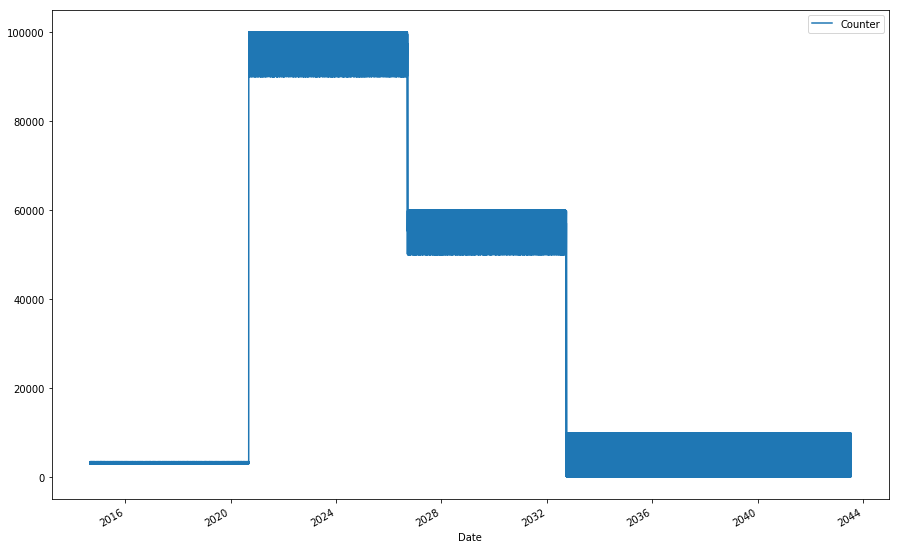

In [39]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
df.plot()

Populating the interactive namespace from numpy and matplotlib


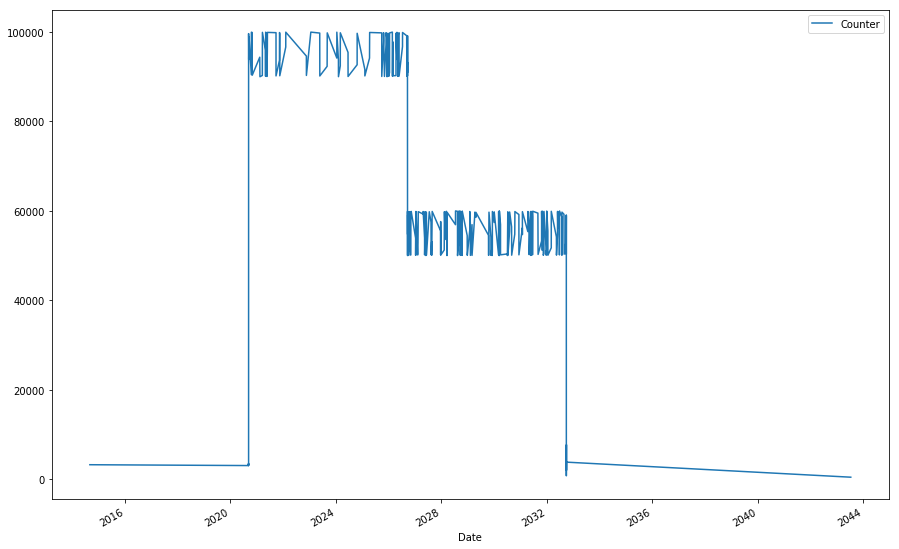

In [40]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
box_car_df.plot()

Populating the interactive namespace from numpy and matplotlib


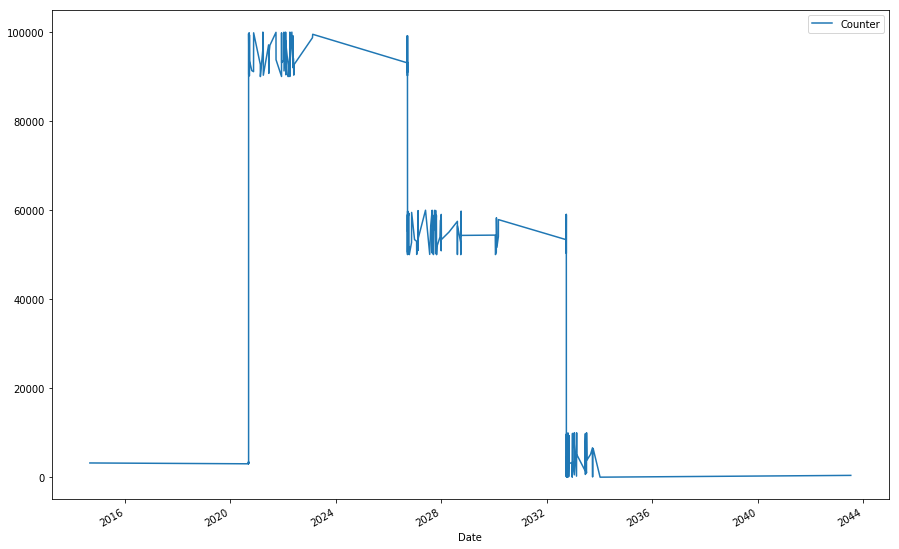

In [41]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
swinging_door_df.plot()

Populating the interactive namespace from numpy and matplotlib


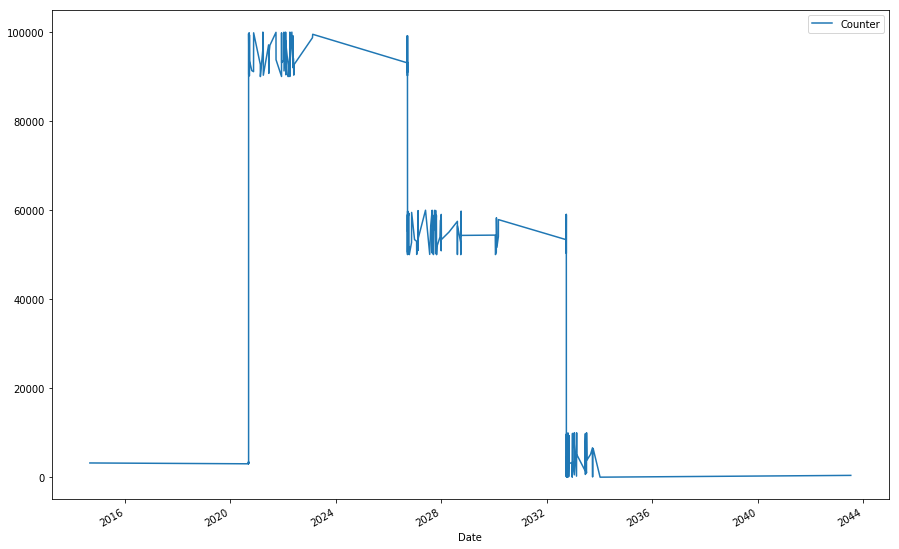

In [42]:
%pylab inline
rcParams['figure.figsize'] = [15, 10]
hybrid_df.plot()